In [1409]:
import pandas as pd
from pandas import Series, DataFrame, TimeGrouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm  
from pandas.tools.plotting import lag_plot

In [1410]:
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf

In [1411]:
import sys
import warnings
warnings.filterwarnings('ignore')

In [1412]:
series = Series.from_csv('daily-min-temp-Melbourne.csv', header=0)

In [1413]:
series[0:10]

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
1981-06-01    15.8
1981-07-01    15.8
1981-08-01    17.4
1981-09-01    21.8
1981-10-01    20.0
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

In [1414]:
print(series.head())

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


## Visualize time series dataset

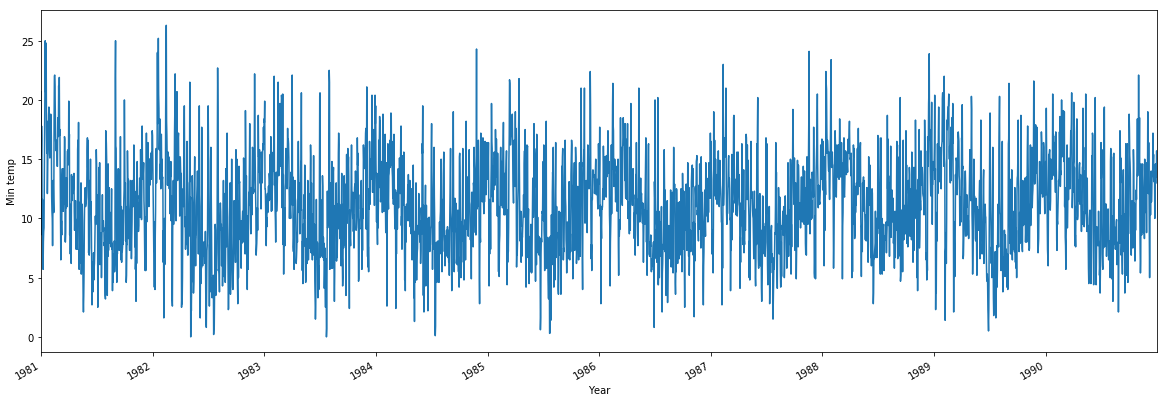

In [1415]:
series.plot(figsize=(20, 7))
plt.xlabel('Year')
plt.ylabel('Min temp')
plt.show()

### Scatter plot

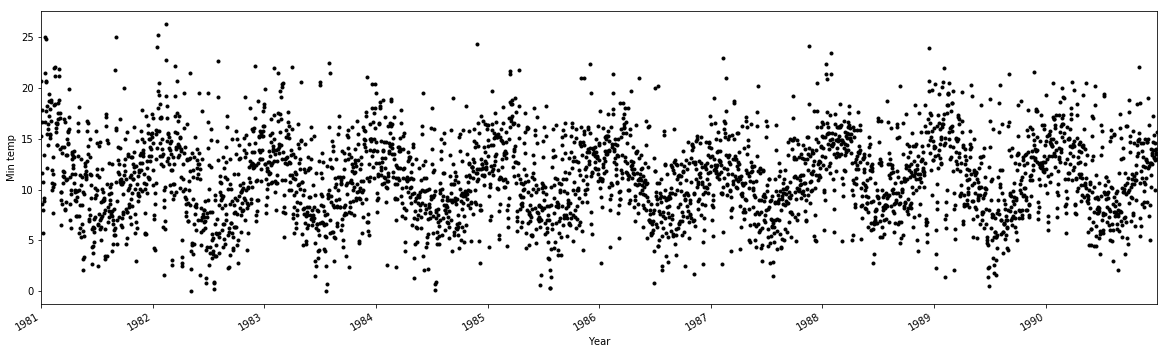

In [1416]:
series.plot(style='k.', figsize=(20, 6))
plt.xlabel('Year')
plt.ylabel('Min temp')
plt.show()

### Plot for every year (1981-1990)

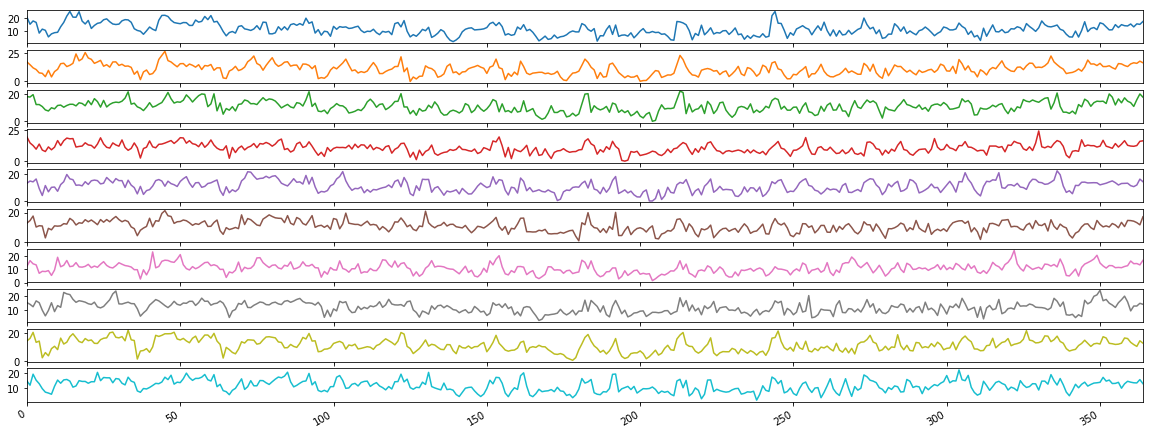

In [1417]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values   
years.plot(subplots=True, legend=False, figsize=(20, 8))
plt.show()

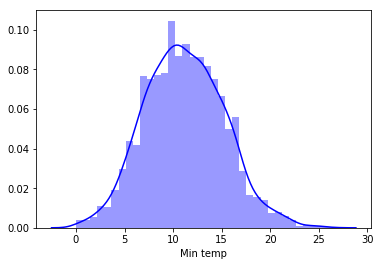

In [1418]:
sns.distplot(series, color = 'blue')
plt.xlabel('Min temp')
plt.show()

We can see a positive linear correlation between $y(t)$ and $y(t+1)$

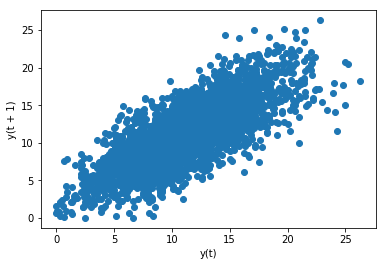

In [1419]:
lag_plot(series)
plt.show()

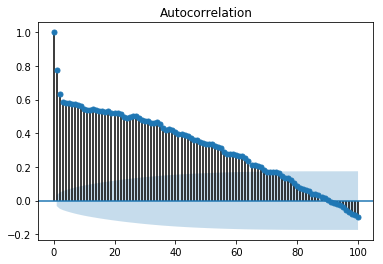

In [1420]:
plot_acf(series, lags = 100)
plt.show()

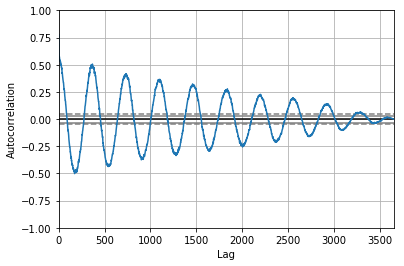

In [1421]:
pd.tools.plotting.autocorrelation_plot(series)
plt.show()

## Time series forecasting

In [1422]:
# Split the dataset
X = series.values
len_test = 25
train, test = X[1:len(X)-len_test], X[len(X)-len_test:]

### AR model

In [1423]:
# Train autoregression
model = AR(train, freq = 'D')
model_fit = model.fit(maxlag = 45, trend = 'nc')
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 45
Coefficients: [ 0.59207075 -0.08825157  0.05002265  0.04232113  0.03913312  0.0275852
  0.0473147   0.01525339  0.03799085  0.00348578  0.00453936  0.02166897
  0.02221487  0.00553876  0.03034239  0.00459317  0.01530312  0.03823939
 -0.01051003  0.02947612  0.02168685  0.01240963 -0.01086634 -0.00087768
  0.018326    0.02457598  0.012314    0.01353083  0.00271231 -0.01236825
  0.03948518 -0.02991614  0.01706233  0.03000403 -0.00192967 -0.01548743
 -0.02978487  0.0353609  -0.00976044 -0.01064442 -0.01346325  0.00398752
 -0.01513662  0.00914078 -0.02324964]


In [1424]:
# Make predictions

predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=16.528938, expected=19.400000
predicted=14.600757, expected=15.500000
predicted=14.370785, expected=14.100000
predicted=14.430580, expected=11.000000
predicted=14.795737, expected=11.100000
predicted=14.332791, expected=14.000000
predicted=14.219660, expected=11.400000
predicted=13.898915, expected=12.500000
predicted=13.700984, expected=13.400000
predicted=13.835572, expected=13.600000
predicted=13.998004, expected=13.900000
predicted=13.981266, expected=17.200000
predicted=13.989208, expected=14.700000
predicted=14.082637, expected=15.400000
predicted=13.898063, expected=13.100000
predicted=14.072018, expected=13.200000
predicted=14.068634, expected=13.900000
predicted=14.325279, expected=10.000000
predicted=14.453751, expected=12.900000
predicted=14.748243, expected=14.600000
predicted=14.634694, expected=14.000000
predicted=14.056295, expected=13.600000
predicted=14.489188, expected=13.500000
predicted=14.681628, expected=15.700000
predicted=14.635648, expected=13.000000


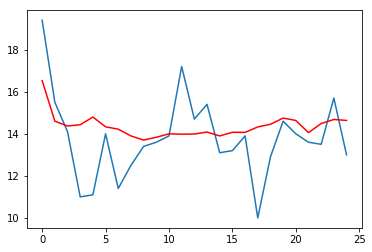

In [1425]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### SARIMAX

In [1426]:
model = sm.tsa.statespace.SARIMAX(series, trend = 'n', order = (1, 0, 2), seasonal_order = (1, 0, 0, 4))
pred_SARIMAX = model.fit(disp=False)

In [1427]:
prediction_SARIMAX = pred_SARIMAX.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [1428]:
#prediction_SARIMAX.values

In [1429]:
# Make predictions
for i in range(len(prediction_SARIMAX.values)):
    print('predicted=%f, expected=%f' % (prediction_SARIMAX.values[i], test[i]))
error_SARIMAX = mean_squared_error(test, prediction_SARIMAX.values)
print('Test MSE: %.3f' % error_SARIMAX)

predicted=16.843140, expected=19.400000
predicted=16.435612, expected=15.500000
predicted=16.775487, expected=14.100000
predicted=14.874470, expected=11.000000
predicted=14.926995, expected=11.100000
predicted=13.052840, expected=14.000000
predicted=13.528398, expected=11.400000
predicted=14.550035, expected=12.500000
predicted=12.678766, expected=13.400000
predicted=13.765348, expected=13.600000
predicted=13.567420, expected=13.900000
predicted=13.767321, expected=17.200000
predicted=13.800051, expected=14.700000
predicted=15.608673, expected=15.400000
predicted=13.804520, expected=13.100000
predicted=15.019875, expected=13.200000
predicted=13.279788, expected=13.900000
predicted=14.004898, expected=10.000000
predicted=13.956210, expected=12.900000
predicted=11.841662, expected=14.600000
predicted=13.919576, expected=14.000000
predicted=13.874560, expected=13.600000
predicted=13.754514, expected=13.500000
predicted=13.558083, expected=15.700000
predicted=13.544522, expected=13.000000


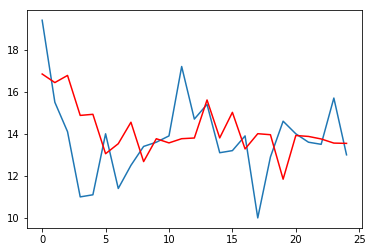

In [1430]:
fig = plt.plot(test)
plt.plot(prediction_SARIMAX.values, color='red')
plt.show()